## Assignment

Import necessary library

Christhofer Laurent Juliant / 1301190379 / IF-43-03

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [ ]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [ ]:
df_can['Total'] = df_can.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [ ]:
### type your answer here
df_can.set_index("Country", inplace=True)

df_can.loc[["India", "China"]]



,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

In [ ]:
### type your answer here
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
Years = list(map(int, range(1980, 2013)))
India = df_can.loc["India", Years]
China = df_can.loc["China", Years]

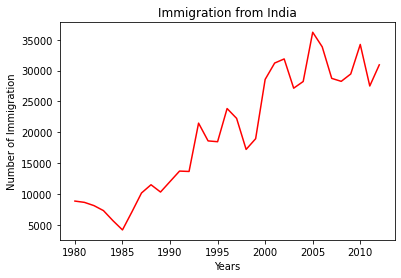

In [ ]:
India.index = India.index.map(int)
India.plot(kind="line", color ='r')

plt.title("Immigration from India")
plt.xlabel("Years")
plt.ylabel("Number of Immigration")

plt.show()

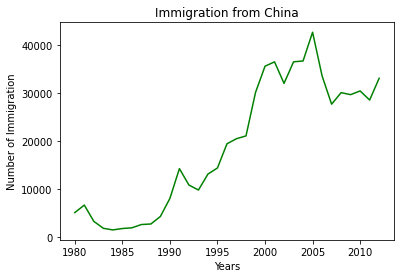

In [ ]:
China.index = China.index.map(int)
China.plot(kind="line", color ='g')

plt.title("Immigration from China")
plt.xlabel("Years")
plt.ylabel("Number of Immigration")

plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [ ]:
### type your answer here
df_can.sort_values(["Total"], ascending=False, axis=0, inplace=True)

df_TrendOfTop5 = df_can.head(5)
df_TrendOfTop5 = df_TrendOfTop5[Years].transpose()
df_TrendOfTop5




Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


Step 2: Plot graph

[]

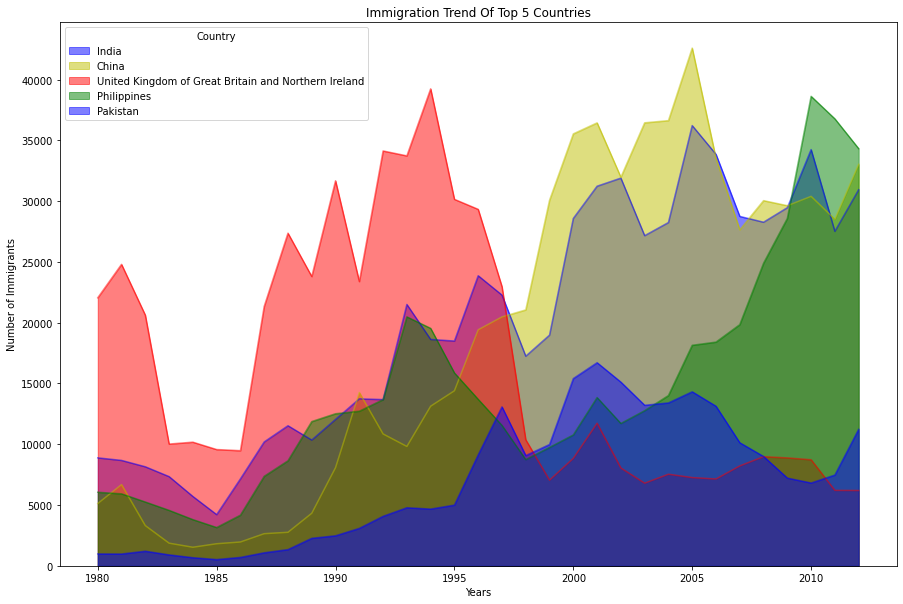

In [ ]:
### type your answer here
df_TrendOfTop5.index = df_TrendOfTop5.index.map(int)
df_TrendOfTop5.plot(kind = "area", stacked=False, figsize=(15, 10), color=['b', 'y', 'r', 'g'])

plt.title("Immigration Trend Of Top 5 Countries")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

plt.plot()



**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

[]

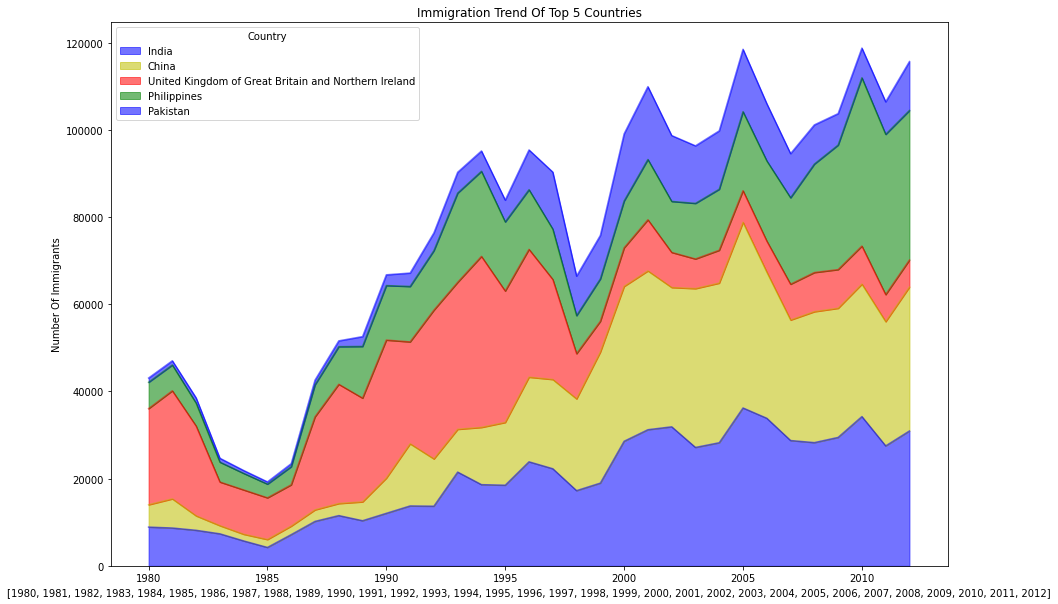

In [ ]:
### type your answer here
df_TrendOfTop5.index = df_TrendOfTop5.index.map(int)
df_TrendOfTop5.plot(kind = "area", alpha=0.55, figsize=(15,10), color=['b', 'y', 'r', 'g'])

plt.title("Immigration Trend Of Top 5 Countries")
plt.xlabel(Years)
plt.ylabel("Number Of Immigrants")

plt.plot()




**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [ ]:
### type your answer here

df_Imdis = df_can.loc[["Greece", "Albania", "Bulgaria"], Years].transpose()
df_Imdis.head()




Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


Text(0, 0.5, 'Number of Years')

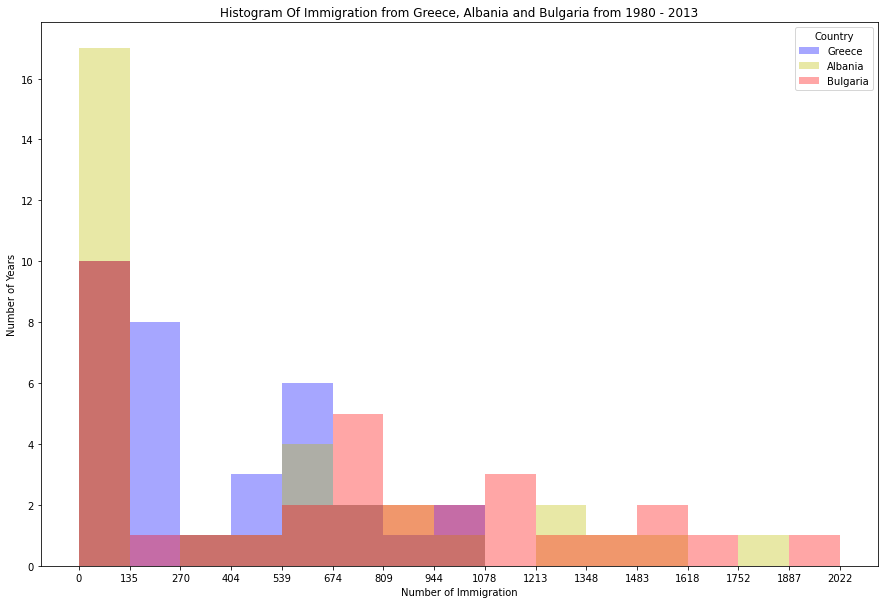

In [ ]:
count, bin_edges = np.histogram(df_Imdis, 15)

df_Imdis.plot(kind='hist', figsize=(15,10), bins=15, alpha=0.35, xticks=bin_edges, color=['b', 'y', 'r', 'g'])

plt.title("Histogram Of Immigration from Greece, Albania and Bulgaria from 1980 - 2013")
plt.xlabel("Number of Immigration")
plt.ylabel("Number of Years")


**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [ ]:
### type your answer here
df_top15 = df_can["Total"].head(15).transpose()
df_top15.head()




Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: Total, dtype: int64

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

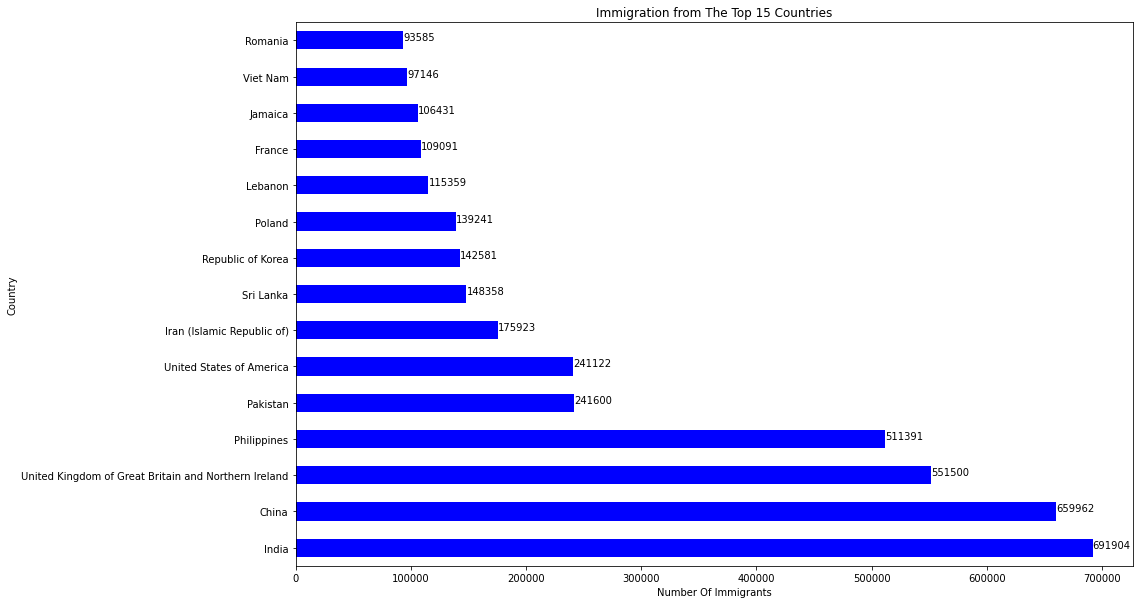

In [ ]:
### type your answer here
df_top15.plot(kind="barh", figsize=(15,10), color = 'b')

plt.title("Immigration from The Top 15 Countries")
plt.ylabel("Country")
plt.xlabel("Number Of Immigrants")

index = list(df_top15.index)
for i in range(len(index)):
    plt.annotate(df_top15.iloc[i],
    xy = (df_top15.iloc[i], i))

plt.show()




In [ ]:
df_top15.index

Index(['India', 'China',
       'United Kingdom of Great Britain and Northern Ireland', 'Philippines',
       'Pakistan', 'United States of America', 'Iran (Islamic Republic of)',
       'Sri Lanka', 'Republic of Korea', 'Poland', 'Lebanon', 'France',
       'Jamaica', 'Viet Nam', 'Romania'],
      dtype='object', name='Country')

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).